In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import glob, os
import itertools
import scikit_posthocs as sp
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
pd.options.mode.chained_assignment = None

In [2]:
ltr_gff = pd.DataFrame()
ltr_type = ['Gypsy_LTR_retrotransposon', 'Copia_LTR_retrotransposon', 'LTR_retrotransposon', ]
ltr_gff['ltr_type'] = ltr_type
for file in glob.glob("<ltr_retriever_results>/*.pass.list.gff3"):
    raw = pd.read_csv(file, sep = '\t', header = None, index_col = 0)
    TE_gff = raw[raw[2].isin(['Copia_LTR_retrotransposon', 'Gypsy_LTR_retrotransposon', 'LTR_retrotransposon' ])] #delete all rows containing TIR TSD and repeat info
    identity = []
    for i in TE_gff.iloc():
        identity.append(i[8].split('ltr_identity=')[1].split(';')[0])
    TE_gff['te_identitiy'] = identity
    #set time
    TE_gff['insertion_time'] = [(1-float(i))/(2*1.4e-8) for i in TE_gff['te_identitiy']] 
    
    species = '_'.join('_'.join(file.split('/')[-1].split('_')[:2]).split('.')[:1])
    ltr_gff[species] = [list(TE_gff['insertion_time'][TE_gff[2] == i]) for i in ltr_type]
ltr_gff

,ltr_type,d_viminea,b_tournefortii,m_suffruticosa,b_oleracea,c_annua,h_incana1,d_erucoides,m_moricandioides,m_arvensis,m_nitens,h_incana3,d_tenuifolia,c_gynandra,a_alpina,b_gravinae,a_thaliana
0,Gypsy_LTR_retrotransposon,"[657142.8571428561, 1660714.2857142852, 127857...","[910714.2857142845, 842857.1428571412, 1382142...","[1100000.0000000019, 1367857.142857143, 703571...","[1496428.5714285732, 1435714.2857142861, 78928...","[921428.5714285731, 699999.9999999983, 1257142...","[1310714.285714284, 1171428.5714285732, 760714...","[453571.42857143015, 35714.28571428575, 946428...","[825000.0000000003, 585714.2857142846, 185714....","[321428.5714285717, 128571.42857143028, 71428....","[1557142.857142856, 1571428.5714285728, 425000...","[1339285.7142857136, 103571.42857142906, 35357...","[2332142.857142858, 657142.8571428561, 0.0, 81...","[207142.85714285812, 1042857.1428571431, 50000...","[0.0, 153571.42857142753, 46428.57142857028, 0...","[207142.85714285812, 1042857.1428571431, 50000...","[2460714.2857142845, 1785714.2857142873, 89642..."
1,Copia_LTR_retrotransposon,"[446428.57142856985, 985714.2857142843, 392857...","[1382142.8571428556, 421428.5714285726, 946428...","[1214285.7142857155, 1374999.9999999993, 11892...","[185714.2857142851, 0.0, 0.0, 1321428.57142857...","[1289285.714285715, 428571.428571429, 600000.0...","[2528571.4285714277, 1321428.5714285725, 77142...","[2349999.999999999, 2339285.7142857146, 160714...","[1221428.5714285718, 60714.28571428696, 642857...","[514285.71428571315, 299999.99999999866, 73571...","[1607142.8571428587, 878571.428571427, 1449999...","[778571.42857143, 0.0, 149999.99999999933, 137...","[710714.2857142867, 1314285.7142857162, 143214...","[525000.0000000016, 228571.42857142718, 389285...","[0.0, 578571.4285714283, 360714.2857142856, 0....","[525000.0000000016, 228571.42857142718, 389285...","[0.0, 974999.9999999997, 596428.5714285731, 0...."
2,LTR_retrotransposon,"[639285.7142857153, 603571.4285714296, 957142....","[1246428.571428573, 1614285.714285715, 1439285...","[0.0, 825000.0000000003, 678571.4285714292, 69...","[1557142.857142856, 207142.85714285812, 339285...","[3246428.571428571, 1971428.5714285725, 678571...","[2017857.1428571427, 471428.5714285711, 367857...","[128571.42857143028, 196428.57142856962, 0.0, ...","[346428.57142857293, 1921428.57142857, 1071428...","[374999.99999999837, 871428.5714285707, 500000...","[974999.9999999997, 767857.1428571416, 1089285...","[117857.14285714178, 728571.4285714277, 342857...","[0.0, 1117857.1428571427, 603571.4285714296, 2...","[521428.5714285695, 2257142.857142858, 128571....","[453571.42857143015, 210714.2857142863, 224999...","[521428.5714285695, 2257142.857142858, 128571....","[1103571.42857143, 471428.5714285711, 264285.7..."


In [3]:
c3 = ltr_gff[['ltr_type', 'a_thaliana', 'a_alpina' ,'m_moricandioides', 'h_incana1', 'b_oleracea', 'd_viminea', 'b_tournefortii', 'c_annua']]
c34 = ltr_gff[['ltr_type', 'b_gravinae', 'd_erucoides', 'm_arvensis', 'd_tenuifolia', 'h_incana3', 'm_suffruticosa']]

c3_t = c3.T
c3_t.columns = c3_t.iloc[0]
c3_t = c3_t.drop(c3_t.index[0])

c34_t = c34.T
c34_t.columns = c34_t.iloc[0]
c34_t = c34_t.drop(c34_t.index[0])

times_c3 = {}
times_c34 = {}
for i in list(c3.columns)[1:]:
    times_c3[i] = list(itertools.chain.from_iterable(list(c3[i])))
for i in list(c34.columns)[1:]:
    times_c34[i] = list(itertools.chain.from_iterable(list(c34[i]))) 

In [4]:
#make bins:
lens_c3 = []
for species in times_c3.keys():
    bins_c3 = {}
    bins_len = {}
    #make bins: between 0-1mya, 1-2 mya,..., 4-5 mya
    for i in list(np.arange(1e6, 6e6, 1e6)): #define bins
        bins_c3[i] = []
        for m in times_c3[species]:
            if i-1e6 <= m <= i: #check if ltr age is within bin
                bins_c3[i].append(m) #put ltr age into dict with bin as key and age as value
    for i in list(bins_c3.keys()):       #add bin sizes to list 
        bins_len[i] = len(bins_c3[i])
    lens_c3.append(bins_len)
    
lens_c34 = []
for species in times_c34.keys():
    bins_c34 = {}
    bins_len = {}
    for i in list(np.arange(1e6, 6e6, 1e6)):
        bins_c34[i] = []
        for m in times_c34[species]:
            if i-1e6 <= m <= i:
                bins_c34[i].append(m)
    for i in list(bins_c34.keys()):
        bins_len[i] = len(bins_c34[i])
    lens_c34.append(bins_len)



p-value at bin 1: 0.09616954778276697
p-value at bin 2: 0.24053829195348664
p-value at bin 3: 0.3886166605254876
p-value at bin 4: 0.4934985205014265
p-value at bin 5: 0.3385344974743719


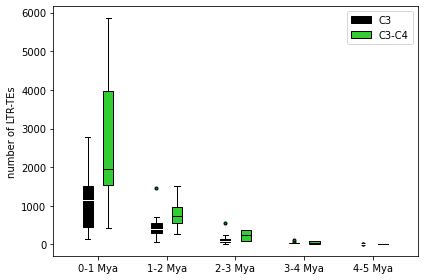

In [5]:
size_fliers = 3
for bi in list(np.arange(1e6, 6e6, 1e6)):
    bp_c3 = plt.boxplot([lens_c3[i][bi] for i in range(len(lens_c3))], positions=[bi/1e6-0.15],
                        patch_artist=True, 
                        boxprops=dict(facecolor='black', color='k'),
                        medianprops=dict(color='white'),
                        flierprops=dict(color='k', markeredgecolor='k', markersize= size_fliers, markerfacecolor = 'green'))
    bp_c34 = plt.boxplot([lens_c34[i][bi] for i in range(len(lens_c34))], positions=[bi/1e6+0.15],
                        patch_artist=True, 
                        boxprops=dict(facecolor='limegreen', color='k'),
                        medianprops=dict(color='k'),
                        flierprops=dict(color='limegreen', markeredgecolor='green', markersize= size_fliers, markerfacecolor = 'green'))
    t, p =stats.ttest_ind([lens_c34[i][bi] for i in range(len(lens_c34))], [lens_c3[i][bi] for i in range(len(lens_c3))])
    print('p-value at bin ' + str(int(bi/1e6)) + ': ' + str(p))
    
plt.legend([bp_c3["boxes"][0], bp_c34["boxes"][0]], ['C3', 'C3-C4'], loc='upper right')
plt.xticks(range(1, 6), ['0-1 Mya', '1-2 Mya', '2-3 Mya', '3-4 Mya', '4-5 Mya'])
plt.ylabel('number of LTR-TEs')
plt.tight_layout()
#plt.savefig('/home/setri100/te_paper/figures/ltr_age_new.png', format = 'png', dpi = 500, transparent = False)
plt.show()

### check for normal distribution

In [6]:
#is data normal distributed? look at critical examples from boxplot
print(stats.shapiro([lens_c3[i][2e6] for i in range(len(lens_c34))]))
print(stats.shapiro([lens_c34[i][1e6] for i in range(len(lens_c34))]))


ShapiroResult(statistic=0.974227786064148, pvalue=0.9195343852043152)
ShapiroResult(statistic=0.8999722599983215, pvalue=0.373766154050827)


### prepare data for 2-way anova

In [7]:
df_anova = pd.DataFrame()
df_anova['age'] = list(lens_c3[1].keys())*14
df_anova['PS_type'] = ['c3'] * 40 + ['c34'] * 30

In [8]:
nums = []
for i in range(len(lens_c3)):
    nums.append(list(lens_c3[i].values()))
for i in range(len(lens_c34)):
    nums.append(list(lens_c34[i].values()))
nums = (list(itertools.chain.from_iterable(nums)))
df_anova['no_of_LTR_TEs'] = nums

In [9]:
df_anova

,age,PS_type,no_of_LTR_TEs
0,1000000.0,c3,144
1,2000000.0,c3,57
2,3000000.0,c3,3
3,4000000.0,c3,1
4,5000000.0,c3,0
...,...,...,...
65,1000000.0,c34,1423
66,2000000.0,c34,865
67,3000000.0,c34,367
68,4000000.0,c34,101


In [10]:
model = ols('no_of_LTR_TEs ~ C(age) + C(PS_type) + C(age):C(PS_type)', data=df_anova).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(age),3.370010e+07,4.0,16.491140,3.631363e-09
C(PS_type),2.419723e+06,1.0,4.736364,3.347887e-02
C(age):C(PS_type),5.508267e+06,4.0,2.695470,3.914818e-02
Residual,3.065291e+07,60.0,NaN,NaN
